# Train,test and split 

Training and testing models are integral part of machine learning which helps us to build and maintain accuracy of ml models and its ability to handle some randomness in data.<br>
We will learn to split dataset into training and testing samples.

In [4]:
# import necessary libraries 
import seaborn as sb 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [2]:
# loading the dataset - titanic dataset  
df = sb.load_dataset('titanic') 
# displaying the first 5 rows of the dataset 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
# checking for nan values in the dataset 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<b>Interpretation:</b> Age variable has got 177 none values which we are gonna handle

In [14]:
# handling the nan values in the age column by filling it with the mean of the age column 
df['age'].fillna(df['age'].mean(), inplace=True) 
# checking for nan values in the age column 
df['age'].isnull().sum()

C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_16796\1450248845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


np.int64(0)

<b>Interpretation:</b> Therefore the required age column's all null values are handled successfully.

In [16]:
# encoding categorical variables - sex,class and who 
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex']) 
print(list(le.classes_))
df['class'] = le.fit_transform(df['class']) 
print(list(le.classes_))
df['who'] = le.fit_transform(df['who']) 
print(list(le.classes_))
# selecting the features and target variable 
X = df[['sex', 'class', 'who', 'age', 'fare']] 
y = df['survived'] 
# splitting the dataset into training and testing samples 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # taking 20% of the data for testing

[np.int64(0), np.int64(1)]
[np.int64(0), np.int64(1), np.int64(2)]
[np.int64(0), np.int64(1), np.int64(2)]


Now lets visualize the training and testing samples based on fare

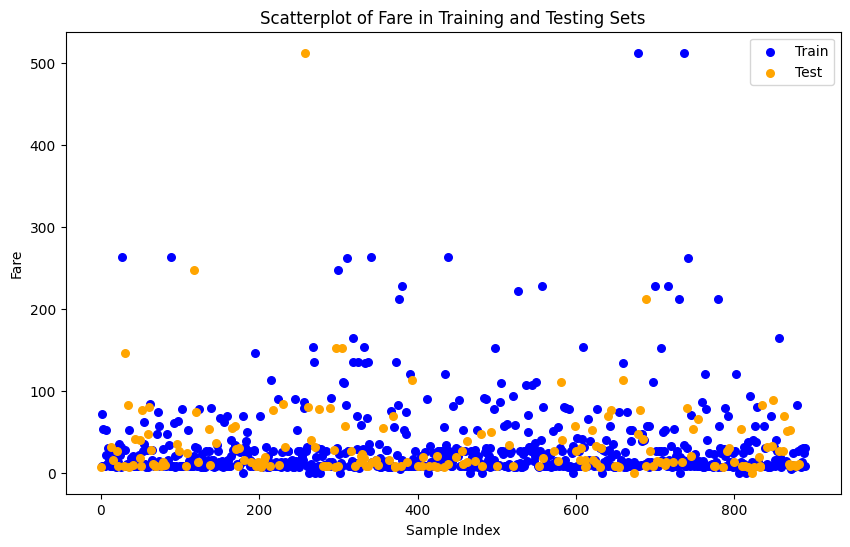

In [8]:
# Visualizing the training and testing samples based on fare
plt.figure(figsize=(10, 6))
plt.scatter(X_train.index, X_train['fare'], label='Train', color='blue', s=30)
plt.scatter(X_test.index, X_test['fare'],  label='Test', color='orange', s=30)
plt.xlabel('Sample Index')
plt.ylabel('Fare')
plt.title('Scatterplot of Fare in Training and Testing Sets')
plt.legend()

In [17]:
# predicting the probability of survival with input data - sex - male(0), class - 1st(1), who - (0), age - 30, fare - 100
model = LogisticRegression() 
model.fit(X_train, y_train) 
survival_prob = model.predict_proba([[1, 1, 0, 30, 100]])[0][1] 
print(f"Probability of survival: {survival_prob:.2f}")

Probability of survival: 0.23


c:\Users\Sakriya Pyakurel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [18]:
# checking the accuracy of the model on the test set 
accuracy = model.score(X_test, y_test) 
print(f"Accuracy of the model on the test set: {accuracy:.2f}")

Accuracy of the model on the test set: 0.83


<b>Interpretation:</b> The above logistic regression model is 83% accurate 